# 📘 Estudo de Análise de Dados com Pandas e Matplotlib
Este notebook demonstra como explorar, limpar e visualizar dados de músicas e playlists utilizando Python.

As bibliotecas utilizadas serão **Pandas** para manipulação de dados e **Matplotlib** para visualização.

In [1]:
# 📦 1. Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [4]:
# 📥 2. Ler os arquivos CSV
# ⚠️ Certifique-se de que os arquivos estão na mesma pasta do notebook ou ajuste o caminho
genres = pd.read_csv('genres_artists.csv')
playlists = pd.read_csv('playlists_tracks.csv')

In [5]:
# 👀 3. Exploração inicial dos DataFrames (descomente para explorar)
playlists.shape         # Verificar o número de linhas e colunas
genres.head(10)         # Mostrar as 10 primeiras linhas do arquivo genres
playlists.head(10)      # Mostrar as 10 primeiras linhas do arquivo playlists
playlists.info()        # Verificar tipos de dados e valores nulos
playlists.describe()    # Estatísticas descritivas das colunas numéricas
playlists['playlist_name']                 # Listar nomes das playlists
playlists['track_name'].value_counts()     # Contar quantas vezes cada música aparece

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8661 non-null   int64 
 1   playlist_id         8661 non-null   object
 2   playlist_name       8661 non-null   object
 3   track_id            8661 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8661 non-null   object
 8   popularity          8661 non-null   int64 
 9   duration_ms         8661 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 676.8+ KB


track_name
Wish You Were Here                 15
All Night                          14
The Suburbs                        14
Hold On                            14
Crosswords                         14
                                   ..
Who Am I                            1
Beija Flor                          1
Et si tu n'existais pas             1
Vagabond                            1
Enter Sandman - Remastered 2021     1
Name: count, Length: 3869, dtype: int64

In [6]:
# 🧭 4. Converter coluna de data para o tipo datetime
# Aqui usamos 'errors="coerce"' para evitar erro se alguma data estiver inválida
playlists['album_release_date_adjusted'] = pd.to_datetime(
    playlists['album_release_date'],
    errors='coerce'
)

In [7]:
# 🗓️ 5. Extrair apenas o ano da data e substituir a coluna original
playlists['album_release_date'] = playlists['album_release_date_adjusted'].dt.year

In [8]:
# 🧹 6. Remover coluna auxiliar criada apenas para conversão de datas
playlists.drop(columns=['album_release_date_adjusted'], inplace=True)

In [9]:
# 📋 7. Listar todas as colunas do DataFrame (opcional)
playlists.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms'],
      dtype='object')

In [10]:
# 🧼 8. Remover linhas com valores nulos na coluna 'track_name'
playlists_clean = playlists.dropna(subset=['track_name'])

In [11]:
# 🔢 9. Verificar o novo tamanho do DataFrame após a limpeza (opcional)
playlists_clean.shape

(8659, 10)

In [12]:
# 🧮 10. Contar as playlists mais populares (Top 10)
playlist_count = playlists_clean['playlist_name'].value_counts().head(10)
playlist_count

playlist_name
Caminhando sem padrão nenhum         311
Rockzim pra cantar junto             300
cantando feat. rebolando             274
tudo misturado curtindo uma chuva    261
Radio em '00                         241
VOLTA JUVENTUDE                      239
Black power                          231
jovem indie                          219
Top indie                            215
Só ~good vibe~                       210
Name: count, dtype: int64

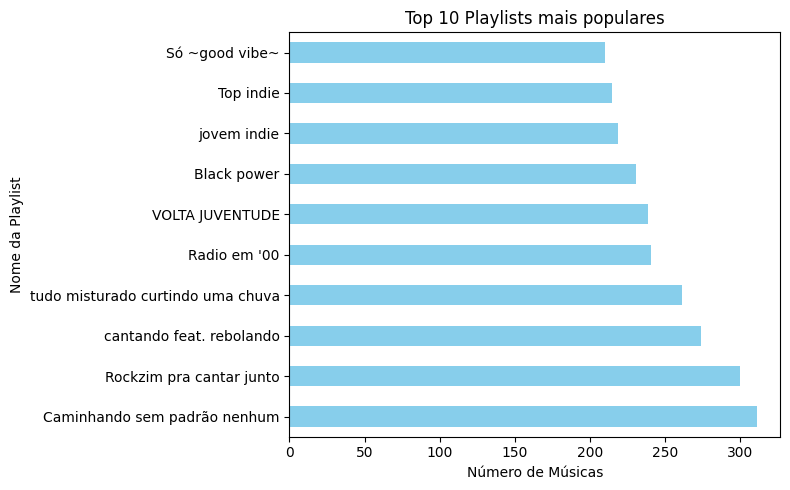

In [13]:
# 📊 11. Plotar gráfico de barras horizontais das playlists mais populares
playlist_count.plot(
    kind='barh',
    figsize=(8, 5),
    title='Top 10 Playlists mais populares',
    color='skyblue',
    xlabel='Número de Músicas',
    ylabel='Nome da Playlist'
)
plt.tight_layout()
plt.show()

In [14]:
# 🧮 12. Contar músicas por ano de lançamento
songs_per_year = playlists_clean['album_release_date'].value_counts().sort_index()
songs_per_year

album_release_date
1958.0     1
1960.0     4
1964.0     3
1966.0     1
1967.0     7
1968.0    14
1969.0     5
1970.0    25
1971.0     5
1972.0    22
1973.0    15
1974.0     7
1975.0    19
1976.0     6
1977.0     9
1978.0     8
1979.0    10
1980.0     5
1981.0     5
1982.0    12
1983.0     2
1984.0    11
1985.0     5
1986.0     3
1987.0     2
1988.0     8
1989.0     2
1990.0     1
1991.0     3
1992.0    18
1993.0     2
1994.0     2
1995.0    34
1996.0     5
1997.0     5
1999.0    21
2000.0    25
2001.0    29
2002.0    27
2003.0    14
2004.0    42
2005.0     3
2006.0    13
2007.0    18
2008.0    11
2009.0    36
2010.0    12
2011.0    20
2012.0     3
2013.0    41
2015.0     1
2016.0    10
2019.0    17
Name: count, dtype: int64

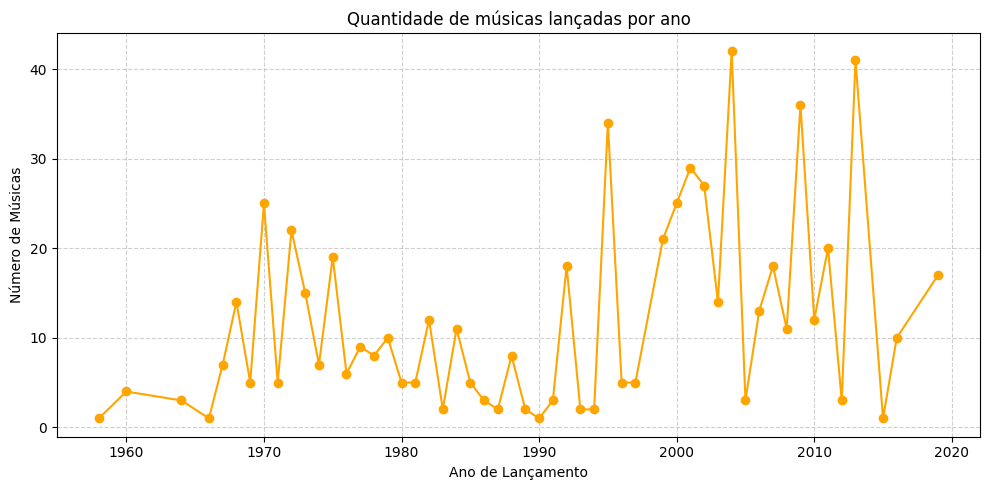

In [19]:
# 📈 13. Plotar gráfico de linha - Número de músicas por ano de lançamento
songs_per_year.plot(
    kind='line',
    marker='o',
    figsize=(10, 5),
    title='Quantidade de músicas lançadas por ano',
    color='orange',
    xlabel='Ano de Lançamento',
    ylabel='Número de Músicas'
)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()